In [134]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from IPython import display

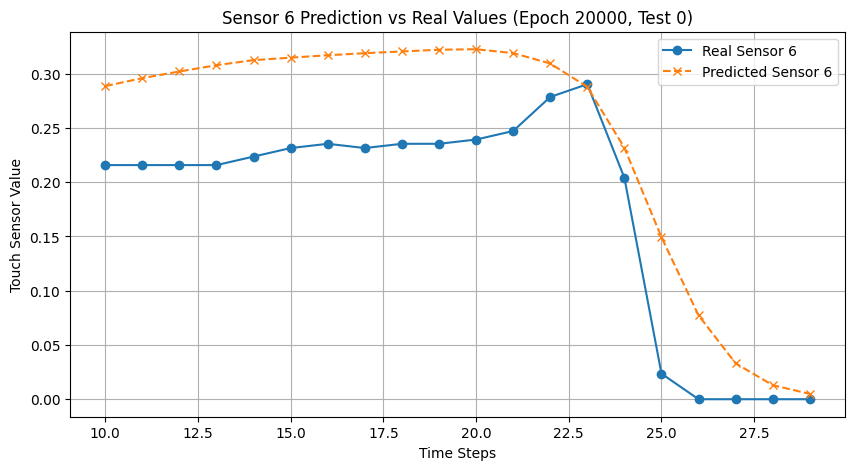

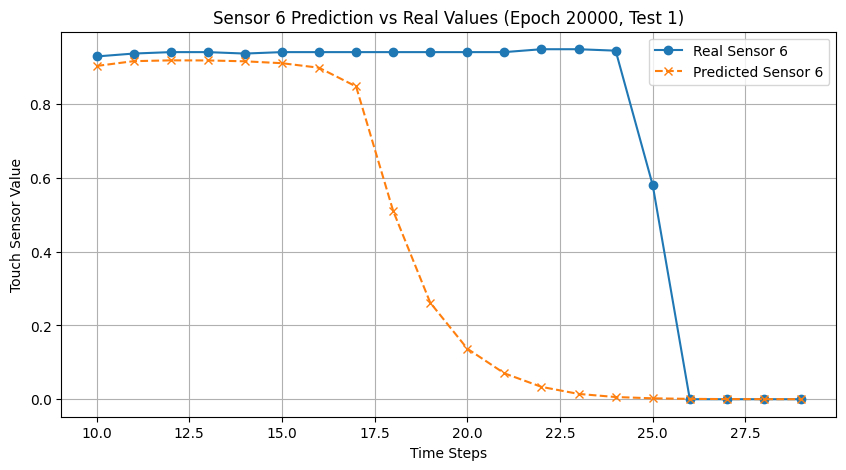

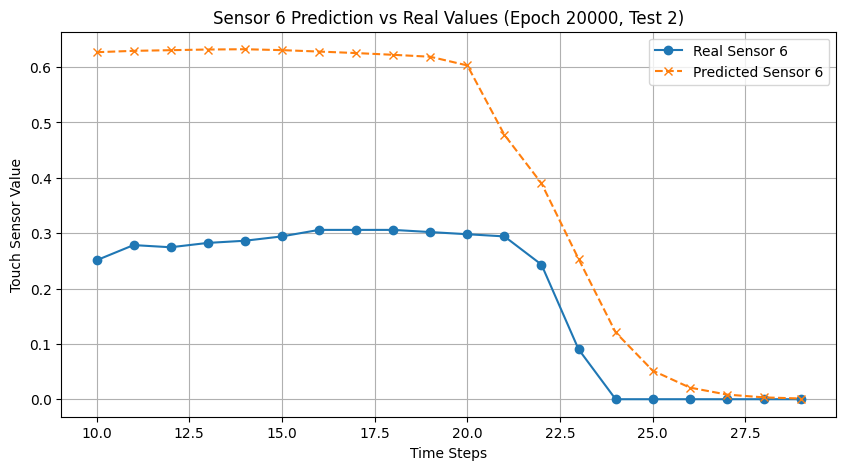

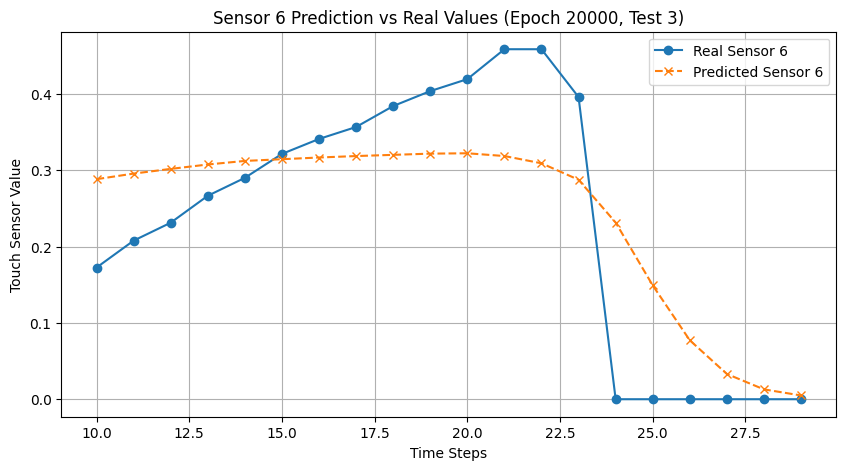

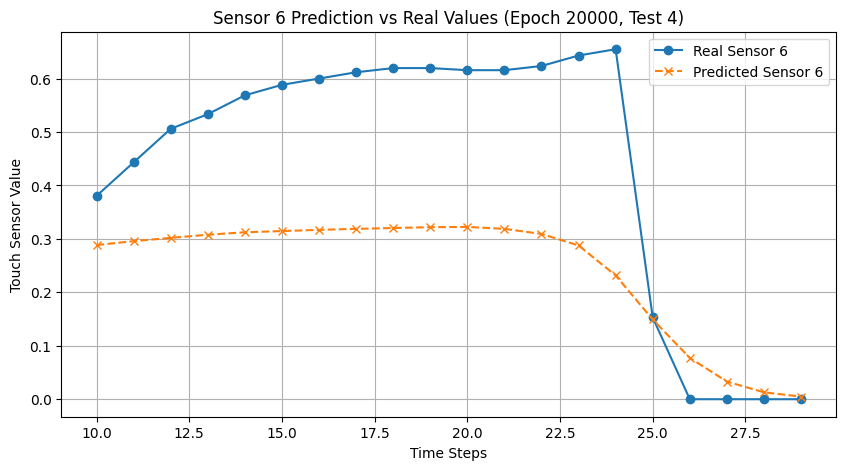

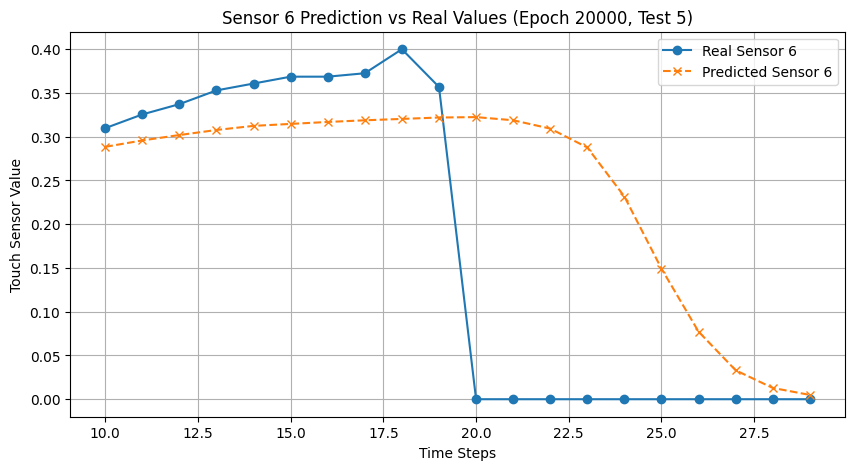

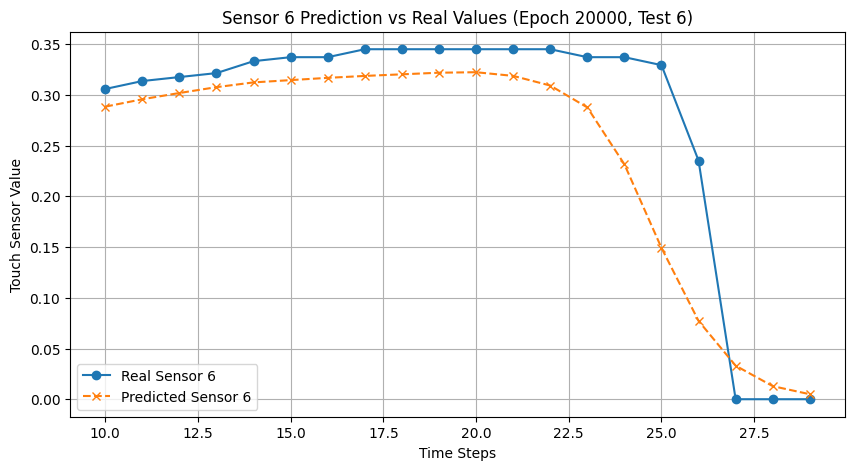

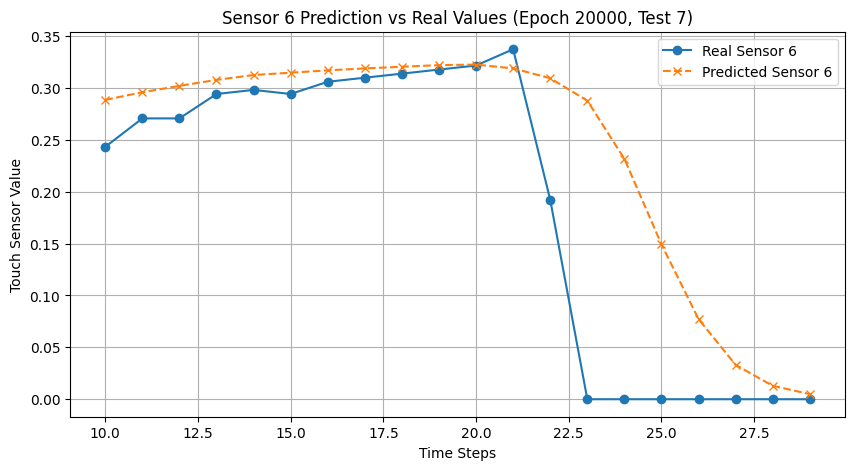

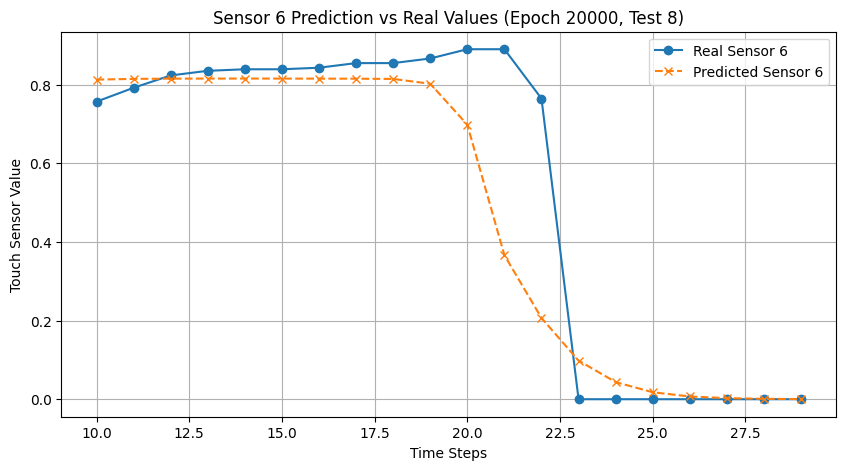

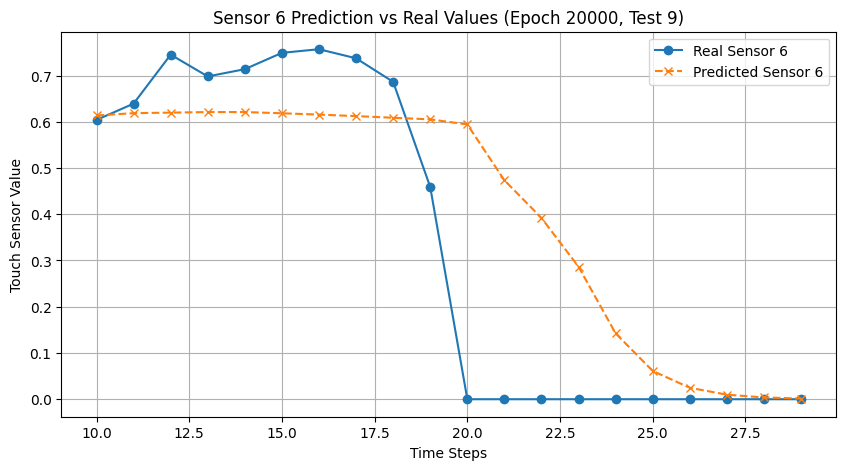

In [147]:

# 🔹 CONFIGURATION: Choose Epoch, Test Case, and Sensor Index
epoch_number = 20000  # Change to desired epoch
#test_case = 1        # Change to desired test case
sensor_index = 6    # Change to the sensor index (0 to 7)


# 🔹 Path to stored data
for test_case in range(10):
    epoch_path = f"Epochs_V1/Epoch{epoch_number}"
    predictions_file = os.path.join(epoch_path, f"predictions_{test_case}.pkl")
    real_values_file = os.path.join(epoch_path, f"real_values_{test_case}.pkl")

    # 🔹 Load Predictions
    with open(predictions_file, "rb") as f:
        predictions = pickle.load(f)

    # 🔹 Load Real Values
    with open(real_values_file, "rb") as f:
        real_values = pickle.load(f)

    #for sensor_index in range(8):
        pred_touch_values = np.array([p[1].squeeze()[sensor_index] for p in predictions])  
        real_touch_values = np.array([r[1].squeeze()[sensor_index] for r in real_values])


        # 🔹 Generate time steps (assuming index 10 to 30)
        time_steps = np.arange(10, 30)
        # 🔹 Plot the Results
        plt.figure(figsize=(10, 5))
        plt.plot(time_steps, real_touch_values, label=f"Real Sensor {sensor_index}", linestyle="solid", marker="o")
        plt.plot(time_steps, pred_touch_values, label=f"Predicted Sensor {sensor_index}", linestyle="dashed", marker="x")

        plt.xlabel("Time Steps")
        plt.ylabel("Touch Sensor Value")
        plt.title(f"Sensor {sensor_index} Prediction vs Real Values (Epoch {epoch_number}, Test {test_case})")
        plt.legend()
        plt.grid(True)
        plt.show()


<Figure size 640x480 with 0 Axes>

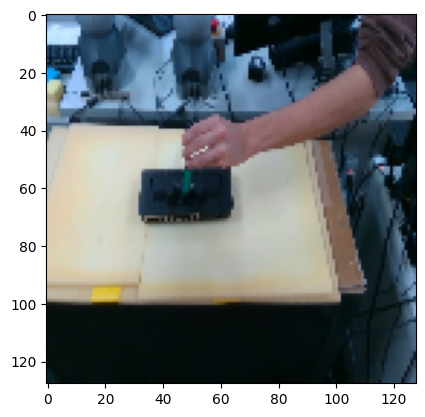

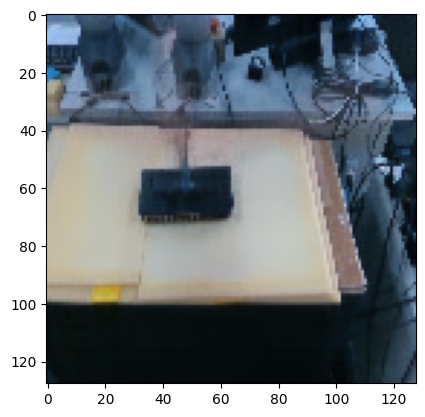

In [148]:
pred_img_values = np.array([p[0].squeeze() for p in predictions])  
real_img_values = np.array([r[0].squeeze() for r in real_values])

i=5
display.clear_output(wait=True)
display.display(pl.gcf())
plt.imshow(real_img_values[i,:,:,:3])
plt.show()
plt.imshow(pred_img_values [i,:,:,:3])
plt.show()